**Face Detection with Haar Cascades**

Note: This is face detection NOT face recognition. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load images
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

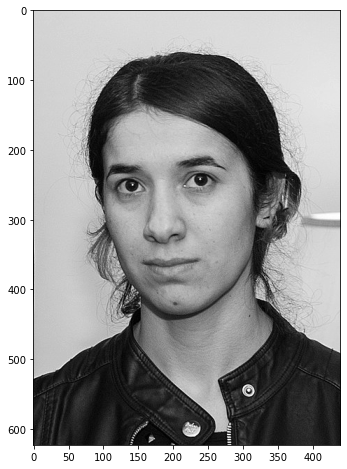

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(nadia, cmap='gray')

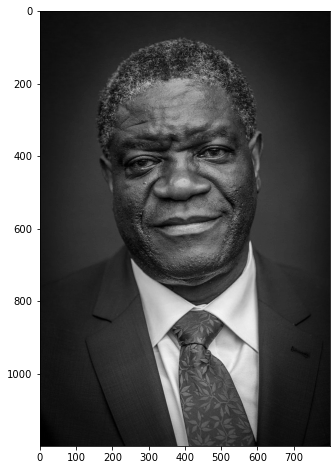

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(denis, cmap='gray')

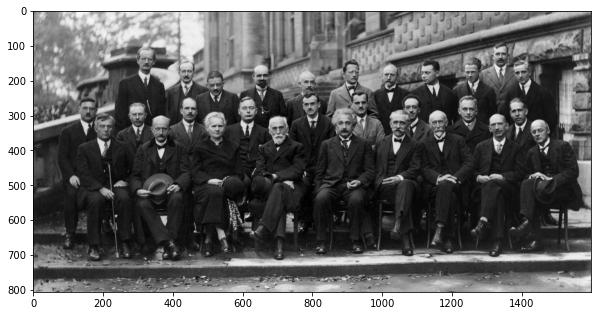

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(solvay, cmap='gray')

**Cascade Files**
OpenCV comes with these pre-trained cascade files 

In [12]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [21]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rect = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img, (x,y),(x+w, y+h),(255,255,255),10)
    return face_img

In [22]:
result = detect_face(denis)

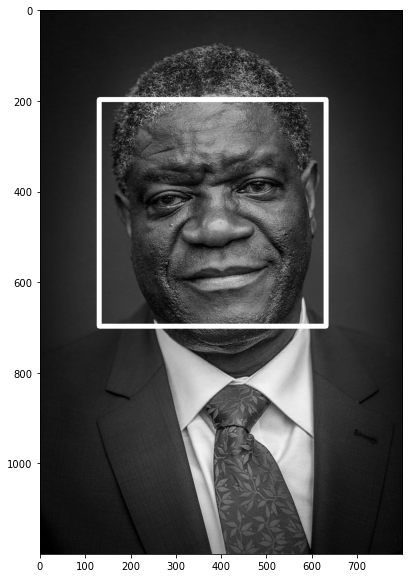

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(result, cmap='gray')

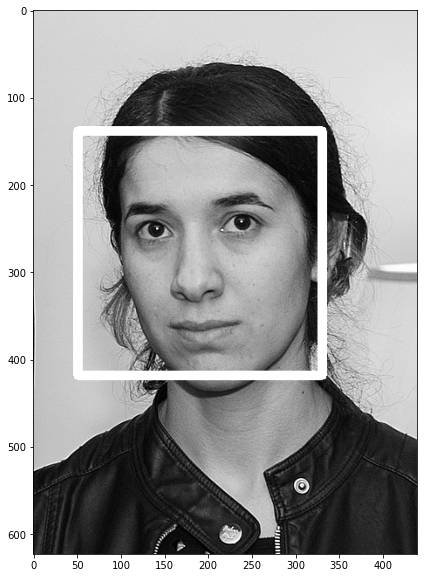

In [24]:
result = detect_face(nadia)
plt.figure(figsize=(10,10))
plt.imshow(result, cmap='gray')

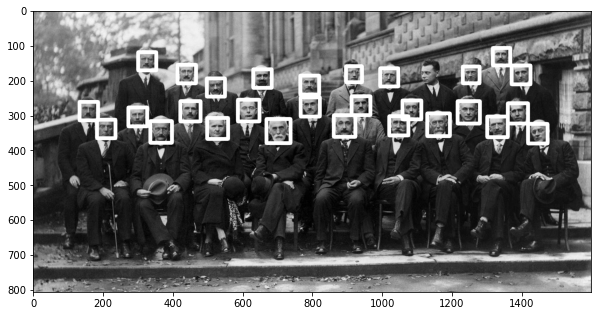

In [25]:
result = detect_face(solvay)
plt.figure(figsize=(10,10))
plt.imshow(result, cmap='gray')

**Eye Cascade File**

In [26]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [27]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

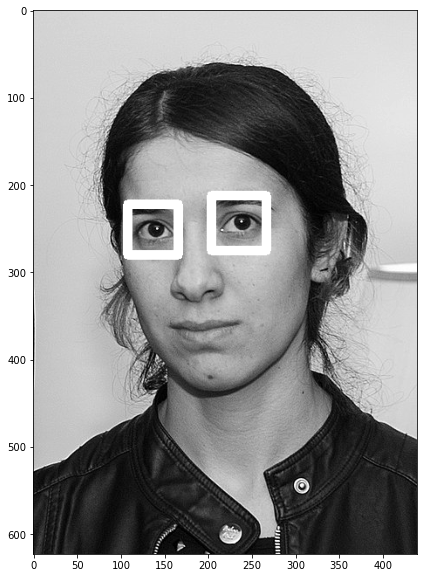

In [28]:
result = detect_eyes(nadia)
plt.figure(figsize=(10,10))
plt.imshow(result,cmap='gray')

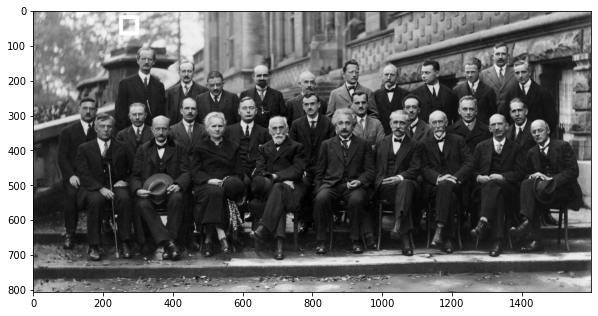

**Conjunction with video**

In [30]:
cap = cv2.VideoCapture(0) #0 ----> live cam

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()